In [12]:
# Install required libraries (run only if not already installed)
!pip install pandas numpy matplotlib seaborn openpyxl scikit-learn joblib


In [13]:
!pip install faker


In [14]:
import pandas as pd
import numpy as np
import random
from faker import Faker
import os

# Setup
fake = Faker()
np.random.seed(42)
random.seed(42)

# Define structure
n = 300  # Number of employees

departments_roles = {
    'IT': ['Junior Developer', 'Senior Developer', 'Team Lead'],
    'Finance': ['Accountant', 'Senior Analyst', 'Finance Manager'],
    'HR': ['HR Executive', 'HR Manager'],
    'Sales': ['Sales Executive', 'Sales Manager'],
    'Marketing': ['Content Creator', 'SEO Specialist', 'Marketing Manager'],
    'Admin': ['Office Assistant', 'Receptionist', 'Supervisor']
}

base_salary_ranges = {
    'Junior Developer': (30000, 50000),
    'Senior Developer': (60000, 90000),
    'Team Lead': (90000, 120000),
    'Accountant': (40000, 60000),
    'Senior Analyst': (70000, 90000),
    'Finance Manager': (90000, 120000),
    'HR Executive': (35000, 55000),
    'HR Manager': (65000, 90000),
    'Sales Executive': (30000, 50000),
    'Sales Manager': (70000, 100000),
    'Content Creator': (30000, 50000),
    'SEO Specialist': (50000, 70000),
    'Marketing Manager': (80000, 110000),
    'Office Assistant': (25000, 40000),
    'Receptionist': (25000, 35000),
    'Supervisor': (40000, 55000)
}

employee_data = []

for emp_id in range(1001, 1001 + n):
    dept = random.choice(list(departments_roles.keys()))
    role = random.choice(departments_roles[dept])
    doj = fake.date_between(start_date='-10y', end_date='-60d')
    experience = pd.Timestamp.now().year - doj.year
    salary_min, salary_max = base_salary_ranges[role]
    
    # Base salary depends on experience level within range
    basic_salary = np.clip(
        int(np.interp(experience, [0, 10], [salary_min, salary_max]) + np.random.randint(-3000, 3000)),
        salary_min, salary_max
    )

    bonus_percent = np.random.uniform(5, 15)
    tax_percent = np.random.uniform(10, 20)
    overtime_hours = np.random.poisson(5)
    leaves_taken = np.random.poisson(2)
    deductions = np.random.randint(500, 3000)

    employee_data.append({
        'EmployeeID': emp_id,
        'Name': fake.name(),
        'Age': random.randint(22 + experience, 60),
        'Department': dept,
        'Role': role,
        'DateOfJoining': doj,
        'ExperienceYears': experience,
        'BasicSalary': basic_salary,
        'BonusPercent': round(bonus_percent, 2),
        'TaxPercent': round(tax_percent, 2),
        'OvertimeHours': overtime_hours,
        'LeavesTaken': leaves_taken,
        'Deductions': deductions
    })

# Create DataFrame
df_realistic = pd.DataFrame(employee_data)

# Save to CSV
os.makedirs('../data', exist_ok=True)
df_realistic.to_csv('../data/employees.csv', index=False)

# Show sample
df_realistic.head()


,EmployeeID,Name,Age,Department,Role,DateOfJoining,ExperienceYears,BasicSalary,BonusPercent,TaxPercent,OvertimeHours,LeavesTaken,Deductions
0,1001,Julie Vasquez,30,Admin,Office Assistant,2017-12-19,8,34860,6.83,17.80,4,1,1269
1,1002,Rachel Hansen,44,Admin,Receptionist,2018-09-22,7,31391,13.32,12.12,3,1,1582
2,1003,Lindsey Santos,53,Finance,Accountant,2017-12-11,8,55558,6.39,12.92,6,1,2714
3,1004,Jacob Lopez,60,IT,Team Lead,2021-12-13,4,104393,14.49,19.66,5,1,2753
4,1005,Courtney Grant,53,IT,Team Lead,2021-09-12,4,102152,7.59,16.63,8,1,1775


In [15]:
df = pd.read_csv('../data/employees.csv')
df.head()


,EmployeeID,Name,Age,Department,Role,DateOfJoining,ExperienceYears,BasicSalary,BonusPercent,TaxPercent,OvertimeHours,LeavesTaken,Deductions
0,1001,Julie Vasquez,30,Admin,Office Assistant,2017-12-19,8,34860,6.83,17.80,4,1,1269
1,1002,Rachel Hansen,44,Admin,Receptionist,2018-09-22,7,31391,13.32,12.12,3,1,1582
2,1003,Lindsey Santos,53,Finance,Accountant,2017-12-11,8,55558,6.39,12.92,6,1,2714
3,1004,Jacob Lopez,60,IT,Team Lead,2021-12-13,4,104393,14.49,19.66,5,1,2753
4,1005,Courtney Grant,53,IT,Team Lead,2021-09-12,4,102152,7.59,16.63,8,1,1775


In [16]:
import pandas as pd

df = pd.read_csv('../data/employees.csv')
df.head()


,EmployeeID,Name,Age,Department,Role,DateOfJoining,ExperienceYears,BasicSalary,BonusPercent,TaxPercent,OvertimeHours,LeavesTaken,Deductions
0,1001,Julie Vasquez,30,Admin,Office Assistant,2017-12-19,8,34860,6.83,17.80,4,1,1269
1,1002,Rachel Hansen,44,Admin,Receptionist,2018-09-22,7,31391,13.32,12.12,3,1,1582
2,1003,Lindsey Santos,53,Finance,Accountant,2017-12-11,8,55558,6.39,12.92,6,1,2714
3,1004,Jacob Lopez,60,IT,Team Lead,2021-12-13,4,104393,14.49,19.66,5,1,2753
4,1005,Courtney Grant,53,IT,Team Lead,2021-09-12,4,102152,7.59,16.63,8,1,1775


In [17]:
def calculate_net_salary(row):
    basic = row['BasicSalary']
    bonus = (row['BonusPercent'] / 100) * basic
    tax = (row['TaxPercent'] / 100) * basic
    overtime = row['OvertimeHours'] * 200  # ₹200 per hour
    leave_penalty = row['LeavesTaken'] * 500  # ₹500 per leave
    deductions = row['Deductions']
    
    net = basic + bonus + overtime - tax - deductions - leave_penalty
    return round(net, 2)

# Apply function
df['NetSalary'] = df.apply(calculate_net_salary, axis=1)
df.head()


,EmployeeID,Name,Age,Department,Role,DateOfJoining,ExperienceYears,BasicSalary,BonusPercent,TaxPercent,OvertimeHours,LeavesTaken,Deductions,NetSalary
0,1001,Julie Vasquez,30,Admin,Office Assistant,2017-12-19,8,34860,6.83,17.80,4,1,1269,30066.86
1,1002,Rachel Hansen,44,Admin,Receptionist,2018-09-22,7,31391,13.32,12.12,3,1,1582,30285.69
2,1003,Lindsey Santos,53,Finance,Accountant,2017-12-11,8,55558,6.39,12.92,6,1,2714,49916.06
3,1004,Jacob Lopez,60,IT,Team Lead,2021-12-13,4,104393,14.49,19.66,5,1,2753,96742.88
4,1005,Courtney Grant,53,IT,Team Lead,2021-09-12,4,102152,7.59,16.63,8,1,1775,92242.46


In [18]:
total_payout = df['NetSalary'].sum()
print(f"💰 Total Monthly Payroll Payout: ₹{round(total_payout):,}")


💰 Total Monthly Payroll Payout: ₹17,826,932


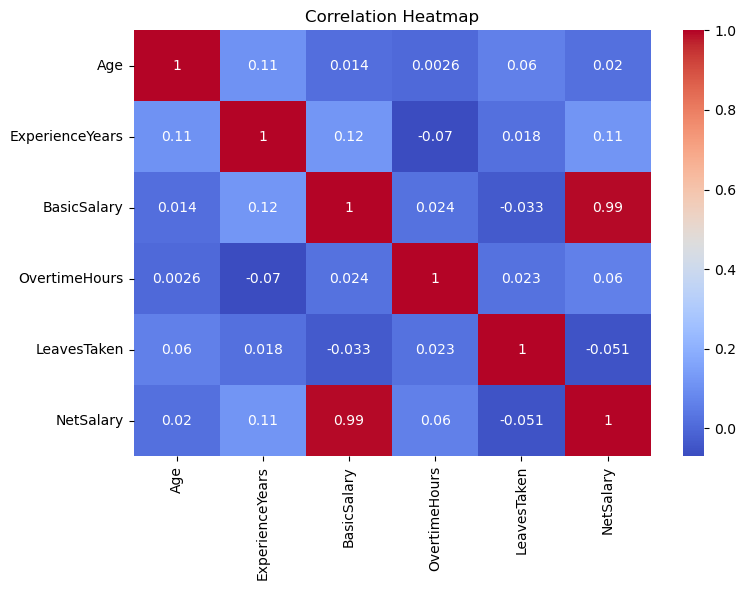

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[['Age', 'ExperienceYears', 'BasicSalary', 'OvertimeHours', 'LeavesTaken', 'NetSalary']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\athar\AppData\Local\Temp\ipykernel_12084\1627818353.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_salary.index, y=dept_salary.values, palette='mako')


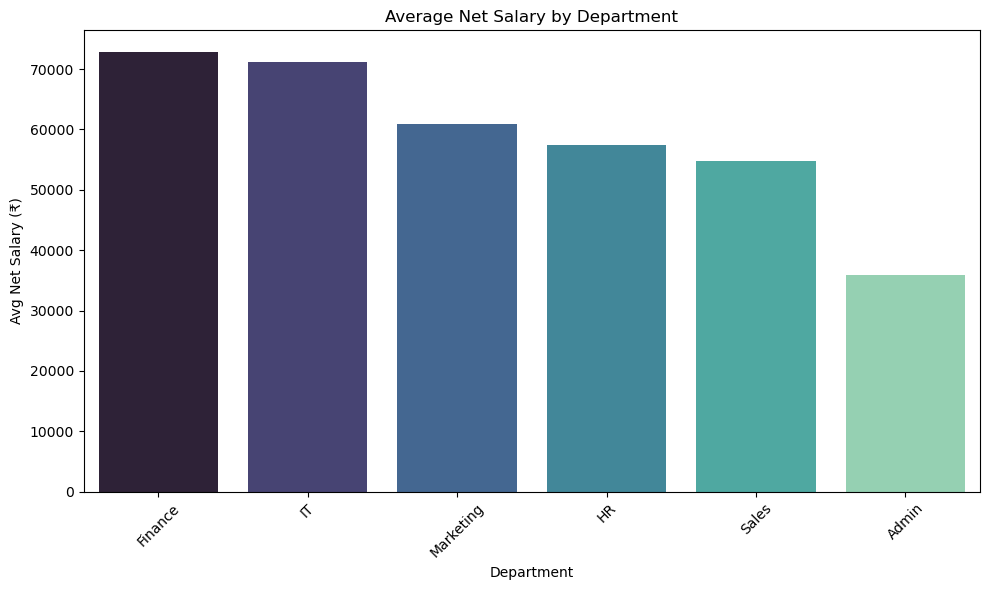

In [20]:
dept_salary = df.groupby('Department')['NetSalary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=dept_salary.index, y=dept_salary.values, palette='mako')
plt.title("Average Net Salary by Department")
plt.ylabel("Avg Net Salary (₹)")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
top_paid = df.sort_values(by='NetSalary', ascending=False).head(10)
top_paid[['EmployeeID', 'Name', 'Department', 'Role', 'NetSalary']]


,EmployeeID,Name,Department,Role,NetSalary
240,1241,Jacqueline Bowers,Marketing,Marketing Manager,112683.34
53,1054,Sharon Sherman,IT,Team Lead,111095.99
26,1027,Allison Ward,Finance,Finance Manager,111047.43
16,1017,Mike Reese PhD,IT,Team Lead,109354.04
62,1063,Candace Jackson,IT,Team Lead,109249.81
112,1113,Pamela Hill,Finance,Finance Manager,106706.54
134,1135,Whitney Hayes,Finance,Finance Manager,106507.26
35,1036,Suzanne Woods,Finance,Finance Manager,106452.19
63,1064,Tina Martin,Finance,Finance Manager,105452.19
82,1083,Jessica Medina,IT,Team Lead,105373.56


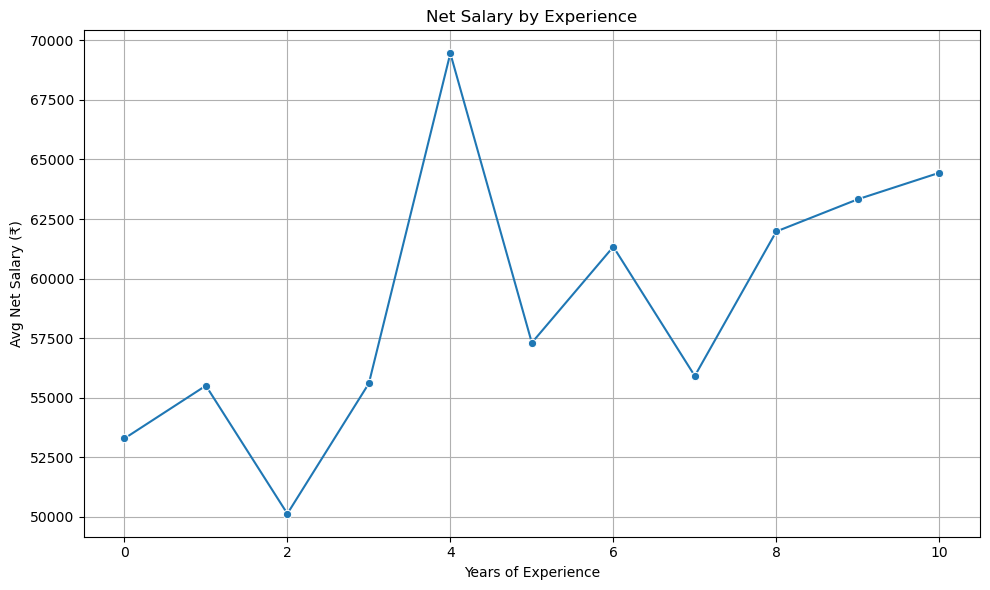

In [22]:
exp_salary = df.groupby('ExperienceYears')['NetSalary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=exp_salary, x='ExperienceYears', y='NetSalary', marker='o')
plt.title("Net Salary by Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Avg Net Salary (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_ml = df.copy()

# Label Encode categorical columns
label_cols = ['Department', 'Role']
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])
    encoders[col] = le  # Save encoder for future predictions

# Features and Target
X = df_ml[['Age', 'ExperienceYears', 'Department', 'Role', 'BasicSalary', 'BonusPercent', 'TaxPercent', 'Deductions', 'OvertimeHours', 'LeavesTaken']]
y = df_ml['NetSalary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 MAE: ₹{mae:.2f}")
print(f"📉 RMSE: ₹{rmse:.2f}")
print(f"🎯 R² Score: {r2:.4f}")


📊 MAE: ₹933.86
📉 RMSE: ₹1294.92
🎯 R² Score: 0.9967


In [25]:
import joblib
os.makedirs("../model", exist_ok=True)
joblib.dump(model, "../model/salary_predictor.pkl")
joblib.dump(encoders, "../model/encoders.pkl")


['../model/encoders.pkl']

In [26]:
# Example: Predict salary for new employee
example = {
    'Age': 30,
    'ExperienceYears': 5,
    'Department': encoders['Department'].transform(['IT'])[0],
    'Role': encoders['Role'].transform(['Senior Developer'])[0],
    'BasicSalary': 80000,
    'BonusPercent': 10,
    'TaxPercent': 15,
    'Deductions': 2000,
    'OvertimeHours': 5,
    'LeavesTaken': 2
}

input_df = pd.DataFrame([example])
predicted_salary = model.predict(input_df)[0]
print(f"🧮 Predicted Net Salary: ₹{predicted_salary:.2f}")


🧮 Predicted Net Salary: ₹73991.99


In [27]:
pip install XlsxWriter


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [29]:
#To run the app
#cd C:\Users\athar\Project
#streamlit run app.py


In [30]:
!pip freeze > requirements.txt


In [31]:
!pip install xlsxwriter


In [32]:
import os

# Make sure 'model' folder exists
os.makedirs("model", exist_ok=True)

# Get top 10 highest paid employees
top_earners = df.sort_values(by='NetSalary', ascending=False).head(10)

# Save the full dataset + top earners to Excel
with pd.ExcelWriter("model/monthly_payroll_report.xlsx", engine='xlsxwriter') as writer:
    df.to_excel(writer, sheet_name='PayrollData', index=False)
    top_earners.to_excel(writer, sheet_name='TopEarners', index=False)
